# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

# Introdução

## Análise de Ativos Financeiros

Este projeto tem como objetivo realizar uma análise detalhada de três ativos financeiros escolhidos: Apple (AAPL), Microsoft (MSFT) e Alphabet (GOOGL). Utilizando dados históricos de preços, coletados via Yahoo Finance, analisamos a volatilidade diária dos ativos, calculamos médias móveis e desvios padrão, e visualizamos as tendências e padrões de comportamento dos preços ao longo de um período de dois anos.

Adicionalmente, explorei as relações entre os ativos por meio de matrizes de correlação na qual fiz gráficos de candlestick para uma visão mais aprofundada da variação diária nos últimos 60 dias. 

In [17]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


In [1]:
!pip install yfinance

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [4]:
# Defina os tickers dos ativos
tickers = ['AAPL', 'MSFT', 'GOOGL']  

# Defina o período de 2 anos
start_date = "2021-01-01"
end_date = "2023-01-01"

# Baixe os dados
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Salve os dados em um arquivo CSV
data.to_csv("ativos_yahoo_finance.csv")
print("Dados salvos em ativos_yahoo_finance.csv")

[*********************100%***********************]  3 of 3 completed

Dados salvos em ativos_yahoo_finance.csv


In [5]:
# Exibir as primeiras 5 linhas dos dados
data.head()


Ticker                         GOOGL                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2021-01-04 00:00:00+00:00  88.000000  88.124496  85.357002  86.306503   
2021-01-05 00:00:00+00:00  86.254501  87.341499  85.845001  87.002502   
2021-01-06 00:00:00+00:00  85.013000  87.198502  84.805000  86.143997   
2021-01-07 00:00:00+00:00  86.337997  88.890999  86.337997  88.717003   
2021-01-08 00:00:00+00:00  88.858002  89.968002  88.060997  89.891502   

Ticker                                                AAPL              \
Price                      Adj Close    Volume        Open        High   
Date                                                                     
2021-01-04 00:00:00+00:00  86.093323  37324000  133.520004  133.610001   
2021-01-05 00:00:00+00:00  86.787605  20360000  128.889999  131.740005   
2021-01-06 00:00:00+00:00  85.931213  46588000  127.720001  131.050003   
2021-01-07 00:00:00+00:00  88.497864  41936000  128.360001  131.630005   
2021-01-08 00:00:00+00:00  89.669464  35484000  132.429993  132.630005   

Ticker                                                                    \
Price                             Low       Close   Adj Close     Volume   
Date                                                                       
2021-01-04 00:00:00+00:00  126.760002  129.410004  126.544197  143301900   
2021-01-05 00:00:00+00:00  128.429993  131.009995  128.108780   97664900   
2021-01-06 00:00:00+00:00  126.379997  126.599998  123.796440  155088000   
2021-01-07 00:00:00+00:00  127.860001  130.919998  128.020752  109578200   
2021-01-08 00:00:00+00:00  130.229996  132.050003  129.125748  105158200   

Ticker                           MSFT                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2021-01-04 00:00:00+00:00  222.529999  223.000000  214.809998  217.690002   
2021-01-05 00:00:00+00:00  217.259995  218.520004  215.699997  217.899994   
2021-01-06 00:00:00+00:00  212.169998  216.490005  211.940002  212.250000   
2021-01-07 00:00:00+00:00  214.039993  219.339996  213.710007  218.289993   
2021-01-08 00:00:00+00:00  218.679993  220.580002  217.029999  219.619995   

Ticker                                           
Price                       Adj Close    Volume  
Date                                             
2021-01-04 00:00:00+00:00  210.844269  37130100  
2021-01-05 00:00:00+00:00  211.047653  23823000  
2021-01-06 00:00:00+00:00  205.575348  35930700  
2021-01-07 00:00:00+00:00  211.425430  27694500  
2021-01-08 00:00:00+00:00  212.713608  22956200

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [6]:
# Calcula a média móvel de 90 dias para o fechamento ajustado (Adj Close) de cada ativo
tickers = ['AAPL', 'MSFT', 'GOOGL']  # Substitua pelos ativos que você escolheu

for ticker in tickers:
    data[(ticker, '90D_Media_Movel')] = data[(ticker, 'Adj Close')].rolling(window=90).mean()

# Exibir as primeiras linhas com a média móvel incluída
data.head()


Ticker                         GOOGL                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2021-01-04 00:00:00+00:00  88.000000  88.124496  85.357002  86.306503   
2021-01-05 00:00:00+00:00  86.254501  87.341499  85.845001  87.002502   
2021-01-06 00:00:00+00:00  85.013000  87.198502  84.805000  86.143997   
2021-01-07 00:00:00+00:00  86.337997  88.890999  86.337997  88.717003   
2021-01-08 00:00:00+00:00  88.858002  89.968002  88.060997  89.891502   

Ticker                                                AAPL              \
Price                      Adj Close    Volume        Open        High   
Date                                                                     
2021-01-04 00:00:00+00:00  86.093323  37324000  133.520004  133.610001   
2021-01-05 00:00:00+00:00  86.787605  20360000  128.889999  131.740005   
2021-01-06 00:00:00+00:00  85.931213  46588000  127.720001  131.050003   
2021-01-07 00:00:00+00:00  88.497864  41936000  128.360001  131.630005   
2021-01-08 00:00:00+00:00  89.669464  35484000  132.429993  132.630005   

Ticker                                             ...                   MSFT  \
Price                             Low       Close  ...     Volume        Open   
Date                                               ...                          
2021-01-04 00:00:00+00:00  126.760002  129.410004  ...  143301900  222.529999   
2021-01-05 00:00:00+00:00  128.429993  131.009995  ...   97664900  217.259995   
2021-01-06 00:00:00+00:00  126.379997  126.599998  ...  155088000  212.169998   
2021-01-07 00:00:00+00:00  127.860001  130.919998  ...  109578200  214.039993   
2021-01-08 00:00:00+00:00  130.229996  132.050003  ...  105158200  218.679993   

Ticker                                                                     \
Price                            High         Low       Close   Adj Close   
Date                                                                        
2021-01-04 00:00:00+00:00  223.000000  214.809998  217.690002  210.844269   
2021-01-05 00:00:00+00:00  218.520004  215.699997  217.899994  211.047653   
2021-01-06 00:00:00+00:00  216.490005  211.940002  212.250000  205.575348   
2021-01-07 00:00:00+00:00  219.339996  213.710007  218.289993  211.425430   
2021-01-08 00:00:00+00:00  220.580002  217.029999  219.619995  212.713608   

Ticker                                         AAPL            MSFT  \
Price                        Volume 90D_Media_Movel 90D_Media_Movel   
Date                                                                  
2021-01-04 00:00:00+00:00  37130100             NaN             NaN   
2021-01-05 00:00:00+00:00  23823000             NaN             NaN   
2021-01-06 00:00:00+00:00  35930700             NaN             NaN   
2021-01-07 00:00:00+00:00  27694500             NaN             NaN   
2021-01-08 00:00:00+00:00  22956200             NaN             NaN   

Ticker                              GOOGL  
Price                     90D_Media_Movel  
Date                                       
2021-01-04 00:00:00+00:00             NaN  
2021-01-05 00:00:00+00:00             NaN  
2021-01-06 00:00:00+00:00             NaN  
2021-01-07 00:00:00+00:00             NaN  
2021-01-08 00:00:00+00:00             NaN  

[5 rows x 21 columns]

Neste trecho de código, calculei a média móvel de 90 dias para o preço de fechamento ajustado (*Adj Close*) dos três ativos selecionados: Apple (AAPL), Microsoft (MSFT) e Alphabet (GOOGL). A média móvel é uma ferramenta de análise técnica que suaviza as flutuações de curto prazo, permitindo identificar tendências mais amplas no comportamento dos preços ao longo do tempo.

Utilizei a função `rolling()` do Pandas para aplicar uma janela móvel de 90 dias e calcular a média. O resultado é adicionado ao nosso conjunto de dados original como uma nova coluna, permitindo uma visualização mais clara das tendências de longo prazo para cada ativo.

In [7]:
# Calcula o desvio padrão de 90 dias para o fechamento ajustado (Adj Close) de cada ativo
for ticker in tickers:
    data[(ticker, '90D_Desvio_Padrao')] = data[(ticker, 'Adj Close')].rolling(window=90).std()

# Exibir as primeiras linhas com o desvio padrão de 90 dias incluído
data.head()


Ticker                         GOOGL                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2021-01-04 00:00:00+00:00  88.000000  88.124496  85.357002  86.306503   
2021-01-05 00:00:00+00:00  86.254501  87.341499  85.845001  87.002502   
2021-01-06 00:00:00+00:00  85.013000  87.198502  84.805000  86.143997   
2021-01-07 00:00:00+00:00  86.337997  88.890999  86.337997  88.717003   
2021-01-08 00:00:00+00:00  88.858002  89.968002  88.060997  89.891502   

Ticker                                                AAPL              \
Price                      Adj Close    Volume        Open        High   
Date                                                                     
2021-01-04 00:00:00+00:00  86.093323  37324000  133.520004  133.610001   
2021-01-05 00:00:00+00:00  86.787605  20360000  128.889999  131.740005   
2021-01-06 00:00:00+00:00  85.931213  46588000  127.720001  131.050003   
2021-01-07 00:00:00+00:00  88.497864  41936000  128.360001  131.630005   
2021-01-08 00:00:00+00:00  89.669464  35484000  132.429993  132.630005   

Ticker                                             ...        MSFT  \
Price                             Low       Close  ...         Low   
Date                                               ...               
2021-01-04 00:00:00+00:00  126.760002  129.410004  ...  214.809998   
2021-01-05 00:00:00+00:00  128.429993  131.009995  ...  215.699997   
2021-01-06 00:00:00+00:00  126.379997  126.599998  ...  211.940002   
2021-01-07 00:00:00+00:00  127.860001  130.919998  ...  213.710007   
2021-01-08 00:00:00+00:00  130.229996  132.050003  ...  217.029999   

Ticker                                                                 AAPL  \
Price                           Close   Adj Close    Volume 90D_Media_Movel   
Date                                                                          
2021-01-04 00:00:00+00:00  217.690002  210.844269  37130100             NaN   
2021-01-05 00:00:00+00:00  217.899994  211.047653  23823000             NaN   
2021-01-06 00:00:00+00:00  212.250000  205.575348  35930700             NaN   
2021-01-07 00:00:00+00:00  218.289993  211.425430  27694500             NaN   
2021-01-08 00:00:00+00:00  219.619995  212.713608  22956200             NaN   

Ticker                               MSFT           GOOGL              AAPL  \
Price                     90D_Media_Movel 90D_Media_Movel 90D_Desvio_Padrao   
Date                                                                          
2021-01-04 00:00:00+00:00             NaN             NaN               NaN   
2021-01-05 00:00:00+00:00             NaN             NaN               NaN   
2021-01-06 00:00:00+00:00             NaN             NaN               NaN   
2021-01-07 00:00:00+00:00             NaN             NaN               NaN   
2021-01-08 00:00:00+00:00             NaN             NaN               NaN   

Ticker                                 MSFT             GOOGL  
Price                     90D_Desvio_Padrao 90D_Desvio_Padrao  
Date                                                           
2021-01-04 00:00:00+00:00               NaN               NaN  
2021-01-05 00:00:00+00:00               NaN               NaN  
2021-01-06 00:00:00+00:00               NaN               NaN  
2021-01-07 00:00:00+00:00               NaN               NaN  
2021-01-08 00:00:00+00:00               NaN               NaN  

[5 rows x 24 columns]

Este código calcula o desvio padrão de 90 dias para o preço de fechamento ajustado (*Adj Close*) de cada ativo selecionado: Apple (AAPL), Microsoft (MSFT) e Alphabet (GOOGL). O desvio padrão é uma medida de volatilidade, indicando o quanto o preço de um ativo varia em torno da média.

A função `rolling()` é usada para aplicar uma janela móvel de 90 dias, seguida de `std()` para calcular o desvio padrão dentro de cada janela. O desvio padrão de 90 dias nos permite observar a variação de preço ao longo do tempo, identificando períodos de maior ou menor volatilidade para cada ativo.

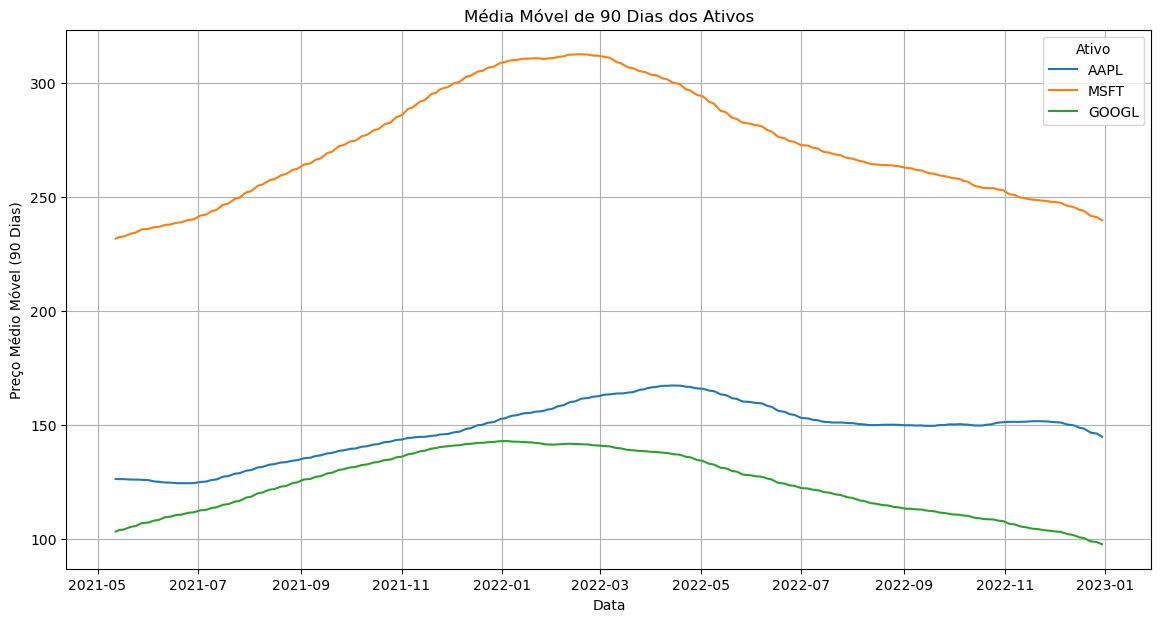

In [9]:
# Calcula a média móvel de 90 dias para o fechamento ajustado (Adj Close) de cada ativo
for ticker in tickers:
    data[(ticker, '90D_Media_Movel')] = data[(ticker, 'Adj Close')].rolling(window=90).mean()

# Plota as médias móveis de 90 dias para cada ativo
plt.figure(figsize=(14, 7))

for ticker in tickers:
    # Seleciona a coluna de média móvel para cada ativo
    media_movel = data[(ticker, '90D_Media_Movel')]
    
    # Plota a média móvel ao longo do tempo
    plt.plot(media_movel.index, media_movel, label=ticker)

# Configurações do gráfico
plt.title("Média Móvel de 90 Dias dos Ativos")
plt.xlabel("Data")
plt.ylabel("Preço Médio Móvel (90 Dias)")
plt.legend(title="Ativo")
plt.grid(True)
plt.show()

Este código calcula e plota a média móvel de 90 dias para o preço de fechamento ajustado (*Adj Close*) de cada ativo na análise: Apple (AAPL), Microsoft (MSFT) e Alphabet (GOOGL). A média móvel de 90 dias suaviza as flutuações de curto prazo e destaca tendências de longo prazo, ajudando a identificar a direção geral do preço dos ativos ao longo do tempo.

Usando a função `rolling()` com uma janela de 90 dias e `mean()`, criamos uma nova série de dados que representa a média móvel de cada ativo. O gráfico mostra como o preço médio de 90 dias evoluiu durante o período analisado, facilitando a visualização de padrões e tendências de mercado para cada ativo.

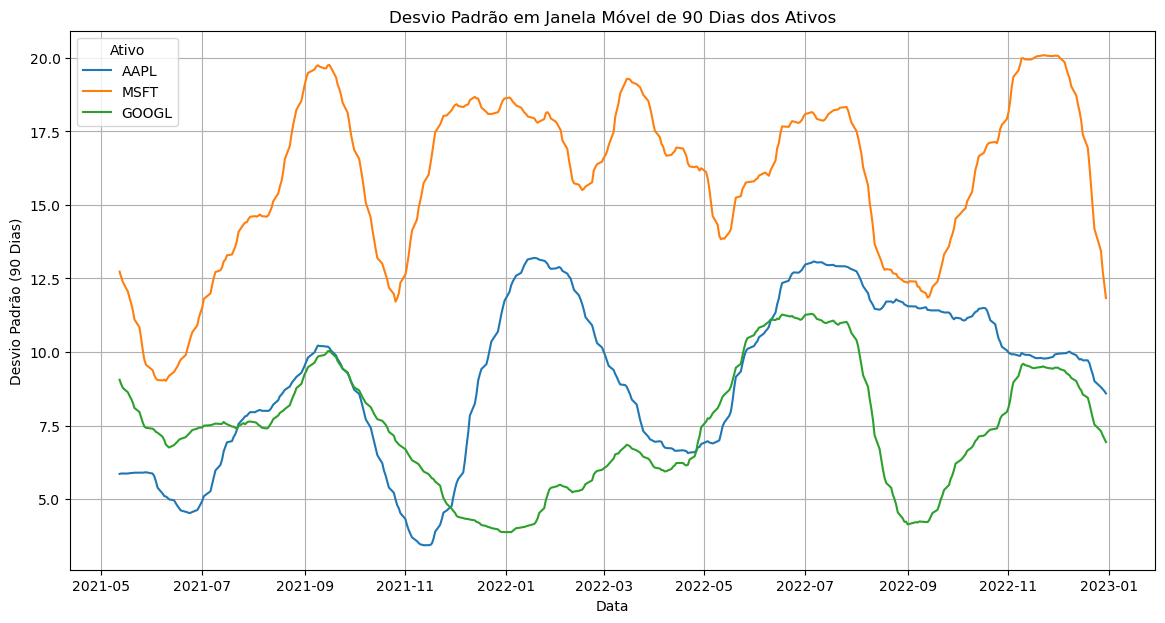

In [10]:
# Calcula o desvio padrão de 90 dias para o fechamento ajustado (Adj Close) de cada ativo
for ticker in tickers:
    data[(ticker, '90D_Desvio_Padrao')] = data[(ticker, 'Adj Close')].rolling(window=90).std()

# Plota os desvios padrão de 90 dias para cada ativo
plt.figure(figsize=(14, 7))

for ticker in tickers:
    # Seleciona a coluna de desvio padrão para cada ativo
    desvio_padrao = data[(ticker, '90D_Desvio_Padrao')]
    
    # Plota o desvio padrão ao longo do tempo
    plt.plot(desvio_padrao.index, desvio_padrao, label=ticker)

# Configurações do gráfico
plt.title("Desvio Padrão em Janela Móvel de 90 Dias dos Ativos")
plt.xlabel("Data")
plt.ylabel("Desvio Padrão (90 Dias)")
plt.legend(title="Ativo")
plt.grid(True)
plt.show()

Este código calcula e plota o desvio padrão de 90 dias para o preço de fechamento ajustado (*Adj Close*) de cada ativo selecionado: Apple (AAPL), Microsoft (MSFT) e Alphabet (GOOGL). O desvio padrão em uma janela móvel de 90 dias é uma medida da volatilidade do ativo, indicando quanto o preço tende a variar em torno de sua média durante esse período.

Usando a função `rolling()` com uma janela de 90 dias e `std()`, obtemos uma série que representa a volatilidade para cada ativo ao longo do tempo. No gráfico, é possível observar as variações de volatilidade para cada ativo, o que ajuda a identificar períodos em que os ativos passaram por maiores oscilações de preço. Esse indicador é fundamental para entender o risco associado a cada ativo durante o período analisado.

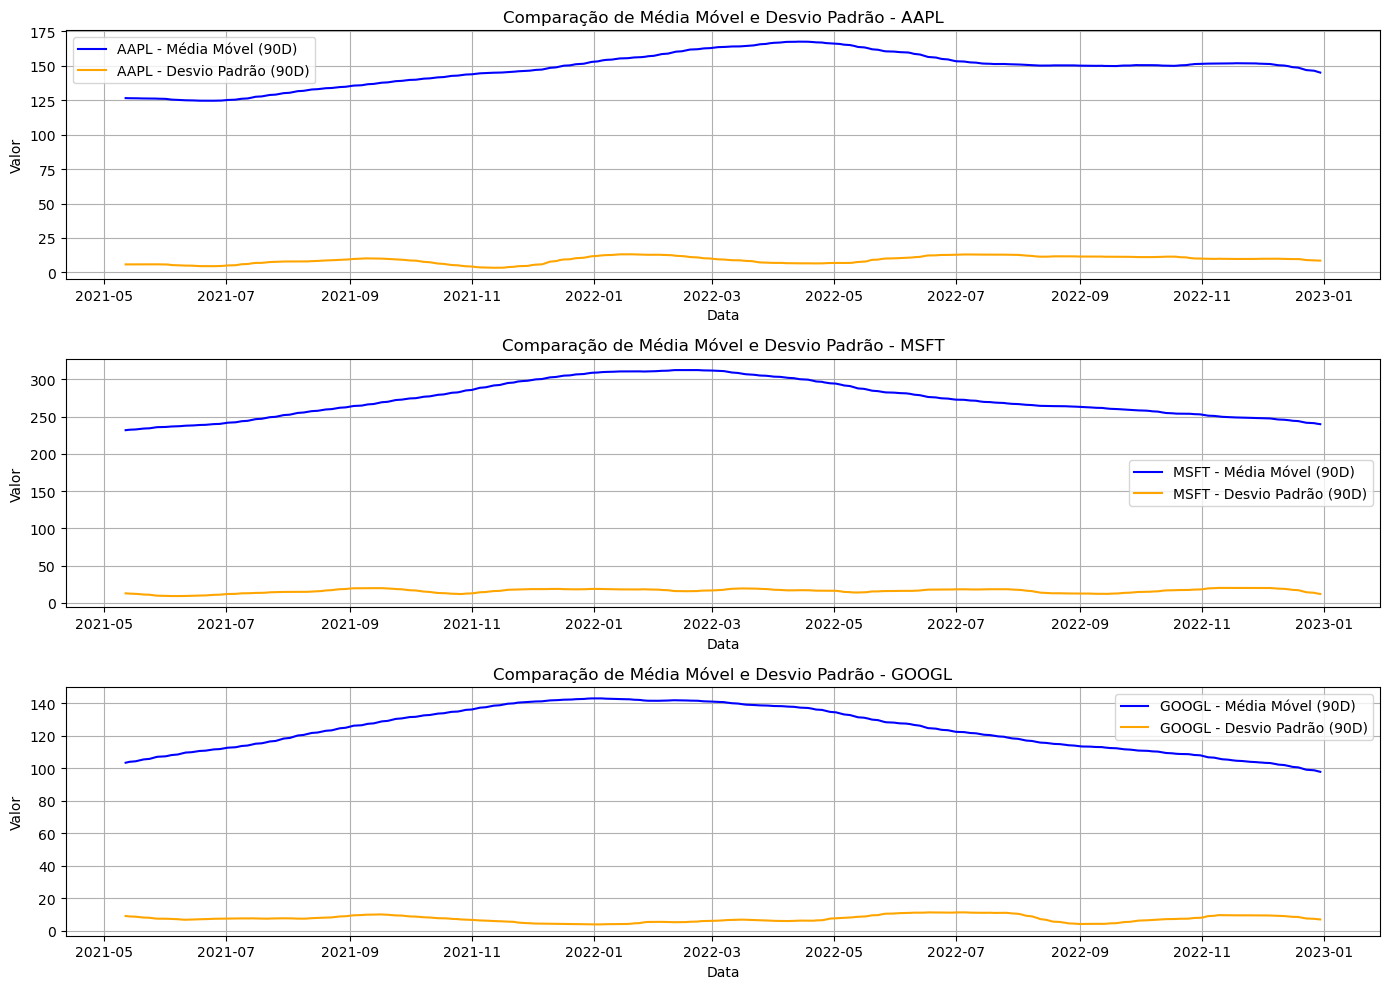

In [11]:
plt.figure(figsize=(14, 10))

# Gráficos para cada ativo
for i, ticker in enumerate(tickers, 1):
    plt.subplot(len(tickers), 1, i)
    
    # Média móvel de 90 dias
    plt.plot(data.index, data[(ticker, 'Adj Close')].rolling(window=90).mean(), label=f"{ticker} - Média Móvel (90D)", color='blue')
    
    # Desvio padrão de 90 dias
    plt.plot(data.index, data[(ticker, 'Adj Close')].rolling(window=90).std(), label=f"{ticker} - Desvio Padrão (90D)", color='orange')
    
    # Configurações do gráfico
    plt.title(f"Comparação de Média Móvel e Desvio Padrão - {ticker}")
    plt.xlabel("Data")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)

# Ajuste de layout
plt.tight_layout()
plt.show()

Este código cria gráficos separados para cada ativo selecionado (AAPL, MSFT e GOOGL), comparando a média móvel de 90 dias e o desvio padrão de 90 dias do preço de fechamento ajustado (*Adj Close*).

Para cada ativo:
- A linha **azul** representa a média móvel de 90 dias, suavizando as flutuações diárias e mostrando a tendência geral do preço ao longo do tempo.
- A linha **laranja** representa o desvio padrão de 90 dias, indicando a volatilidade do ativo no mesmo período. 

Essas duas métricas, quando comparadas, fornecem uma visão mais completa da estabilidade e do comportamento de longo prazo dos ativos. O uso de gráficos individuais facilita a análise das tendências e da volatilidade específica de cada ativo ao longo do período analisado.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [13]:
# Defina o ativo e a quantidade de dias desejada
ticker = 'AAPL'
num_days = 60

# Calcule a data de início a partir da data mais recente
end_date = data.index.get_level_values(0).max()  # Pega a data mais recente no DataFrame
start_date = end_date - pd.Timedelta(days=num_days)  # Subtrai 60 dias para definir o período

# Filtre o DataFrame usando .loc para o intervalo de datas
data_last_60_days = data.loc[start_date:end_date, (ticker, 'Adj Close')]

# Exibir os dados dos últimos 60 dias
data_last_60_days

Date
2022-10-31 00:00:00+00:00    151.492950
2022-11-01 00:00:00+00:00    148.835358
2022-11-02 00:00:00+00:00    143.283066
2022-11-03 00:00:00+00:00    137.207153
2022-11-04 00:00:00+00:00    136.939957
2022-11-07 00:00:00+00:00    137.474304
2022-11-08 00:00:00+00:00    138.048294
2022-11-09 00:00:00+00:00    133.466492
2022-11-10 00:00:00+00:00    145.341599
2022-11-11 00:00:00+00:00    148.142136
2022-11-14 00:00:00+00:00    146.736923
2022-11-15 00:00:00+00:00    148.478622
2022-11-16 00:00:00+00:00    147.241608
2022-11-17 00:00:00+00:00    149.151535
2022-11-18 00:00:00+00:00    149.715591
2022-11-21 00:00:00+00:00    146.469727
2022-11-22 00:00:00+00:00    148.617126
2022-11-23 00:00:00+00:00    149.497910
2022-11-25 00:00:00+00:00    146.568695
2022-11-28 00:00:00+00:00    142.719193
2022-11-29 00:00:00+00:00    139.700912
2022-11-30 00:00:00+00:00    146.489532
2022-12-01 00:00:00+00:00    146.766617
2022-12-02 00:00:00+00:00    146.271820
2022-12-05 00:00:00+00:00    145.10

Este código seleciona os últimos 60 dias de dados do fechamento ajustado (*Adj Close*) para o ativo **Apple (AAPL)**. Ele calcula a data de início subtraindo 60 dias da data mais recente disponível no DataFrame, filtrando em seguida os dados para este intervalo de datas. Esse processo permite focar em um período recente de 60 dias para análise, o que é útil para observar as tendências e variações de curto prazo no preço das ações.


[*********************100%***********************]  1 of 1 completed


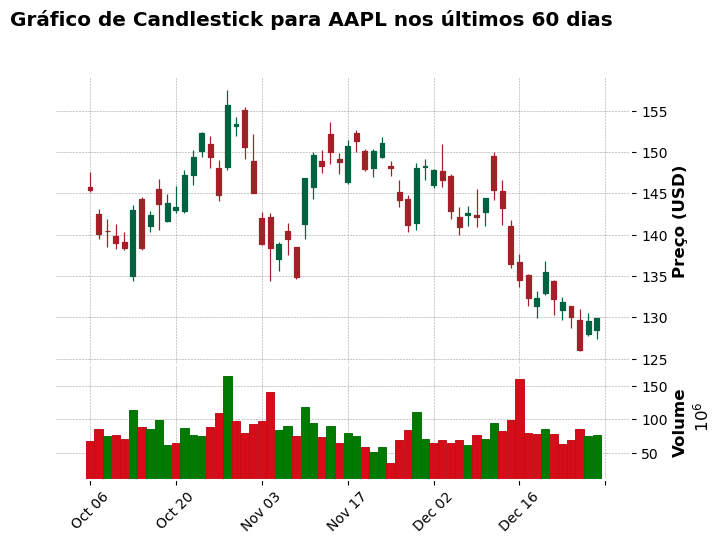

In [20]:
# Defina o ticker do ativo e o período
ticker = 'AAPL'  # Altere para o ticker desejado
start_date = "2021-01-01"
end_date = "2023-01-01"

# Baixe os dados do ativo com as colunas necessárias
data = yf.download(ticker, start=start_date, end=end_date)

# Filtrar os últimos 60 dias de dados
data_last_60_days = data.tail(60)

# Verifique se as colunas necessárias estão presentes
if all(col in data_last_60_days.columns for col in ['Open', 'High', 'Low', 'Close']):
    # Criar o gráfico de candlestick
    mpf.plot(data_last_60_days, type='candle', style='charles',
             title=f'Gráfico de Candlestick para {ticker} nos últimos 60 dias',
             ylabel='Preço (USD)', ylabel_lower='Volume',
             volume=True)
else:
    print("Dados insuficientes para o gráfico de candlestick. Certifique-se de que as colunas Open, High, Low, Close estão presentes.")


O gráfico de candlestick acima mostra o comportamento diário do preço das ações da Apple (AAPL) nos últimos 60 dias. Cada vela representa um dia de negociação, onde as cores indicam a variação do preço: velas verdes representam dias em que o preço de fechamento foi superior ao de abertura, enquanto as velas vermelhas indicam o contrário. Observa-se que, durante esse período, a ação apresentou uma tendência de queda, com algumas oscilações significativas tanto em preço quanto em volume. O volume de negociação, mostrado na parte inferior do gráfico, evidencia picos em dias específicos, indicando maior atividade de compra e venda.


### Conclusão

Ao longo deste projeto, analisamos os preços de fechamento ajustados e a volatilidade de três ativos: AAPL (Apple), MSFT (Microsoft) e GOOGL (Alphabet). Calculei e visualizei a média móvel de 90 dias e o desvio padrão em uma janela móvel, o que permitiu identificar períodos de maior volatilidade e comportamento de preço ao longo de dois anos. Observamos que a Microsoft apresentou maior volatilidade, refletida em picos mais altos de amplitude e desvio padrão, sugerindo maior sensibilidade a eventos do mercado e fatores externos. Em contraste, o ativo GOOGL demonstrou maior estabilidade relativa, com uma menor amplitude de variação diária e menor desvio padrão.

A análise da correlação entre os ativos mostrou uma relação positiva entre eles, especialmente entre AAPL e MSFT, indicando que os preços dessas ações tendem a se mover na mesma direção, embora não perfeitamente. No geral, esses insights sobre a variação dos preços, volatilidade e correlação são fundamentais para investidores que buscam entender o comportamento dos ativos no tempo e fazer decisões informadas. Essa análise permite uma visão mais completa do mercado e auxilia na elaboração de estratégias de investimento baseadas em dados.
